# Oil Spillage Classification

In [42]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import warnings
import os
import sys

from collections import defaultdict, Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

plt.style.use('fivethirtyeight')
plt.tight_layout()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("D:\Open Classroom\Datasets\Oil Spill Classification\oil_spill.csv")
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,214.7,0.21,0.26,0.49,0.10,0.40,99.59,32.19,1.84,0.16,0.20,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.20,-3.71,-0.18,2.19,0.0,2.19,310,16110,0.00,138.68,89,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.30,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,0.0,0.00,704,40140,0.00,68.65,89,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,86.1,0.21,0.32,0.50,0.17,0.34,71.20,16.73,1.82,0.19,0.29,87.65,0,0.46,132.78,-0.01,3.78,0.70,4.79,-3.36,-0.23,1.95,0.0,1.95,29,1530,0.01,38.80,89,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,166.5,0.21,0.26,0.48,0.10,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.20,0.0,2.20,183,10080,0.00,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0.0,2.19,45,2340,0.00,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [32]:
df.shape

(937, 50)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
f_1       937 non-null int64
f_2       937 non-null int64
f_3       937 non-null float64
f_4       937 non-null float64
f_5       937 non-null int64
f_6       937 non-null int64
f_7       937 non-null float64
f_8       937 non-null float64
f_9       937 non-null float64
f_10      937 non-null float64
f_11      937 non-null float64
f_12      937 non-null float64
f_13      937 non-null float64
f_14      937 non-null float64
f_15      937 non-null float64
f_16      937 non-null float64
f_17      937 non-null float64
f_18      937 non-null float64
f_19      937 non-null float64
f_20      937 non-null float64
f_21      937 non-null float64
f_22      937 non-null float64
f_23      937 non-null int64
f_24      937 non-null float64
f_25      937 non-null float64
f_26      937 non-null float64
f_27      937 non-null float64
f_28      937 non-null float64
f_29      937 non-null float64
f_30  

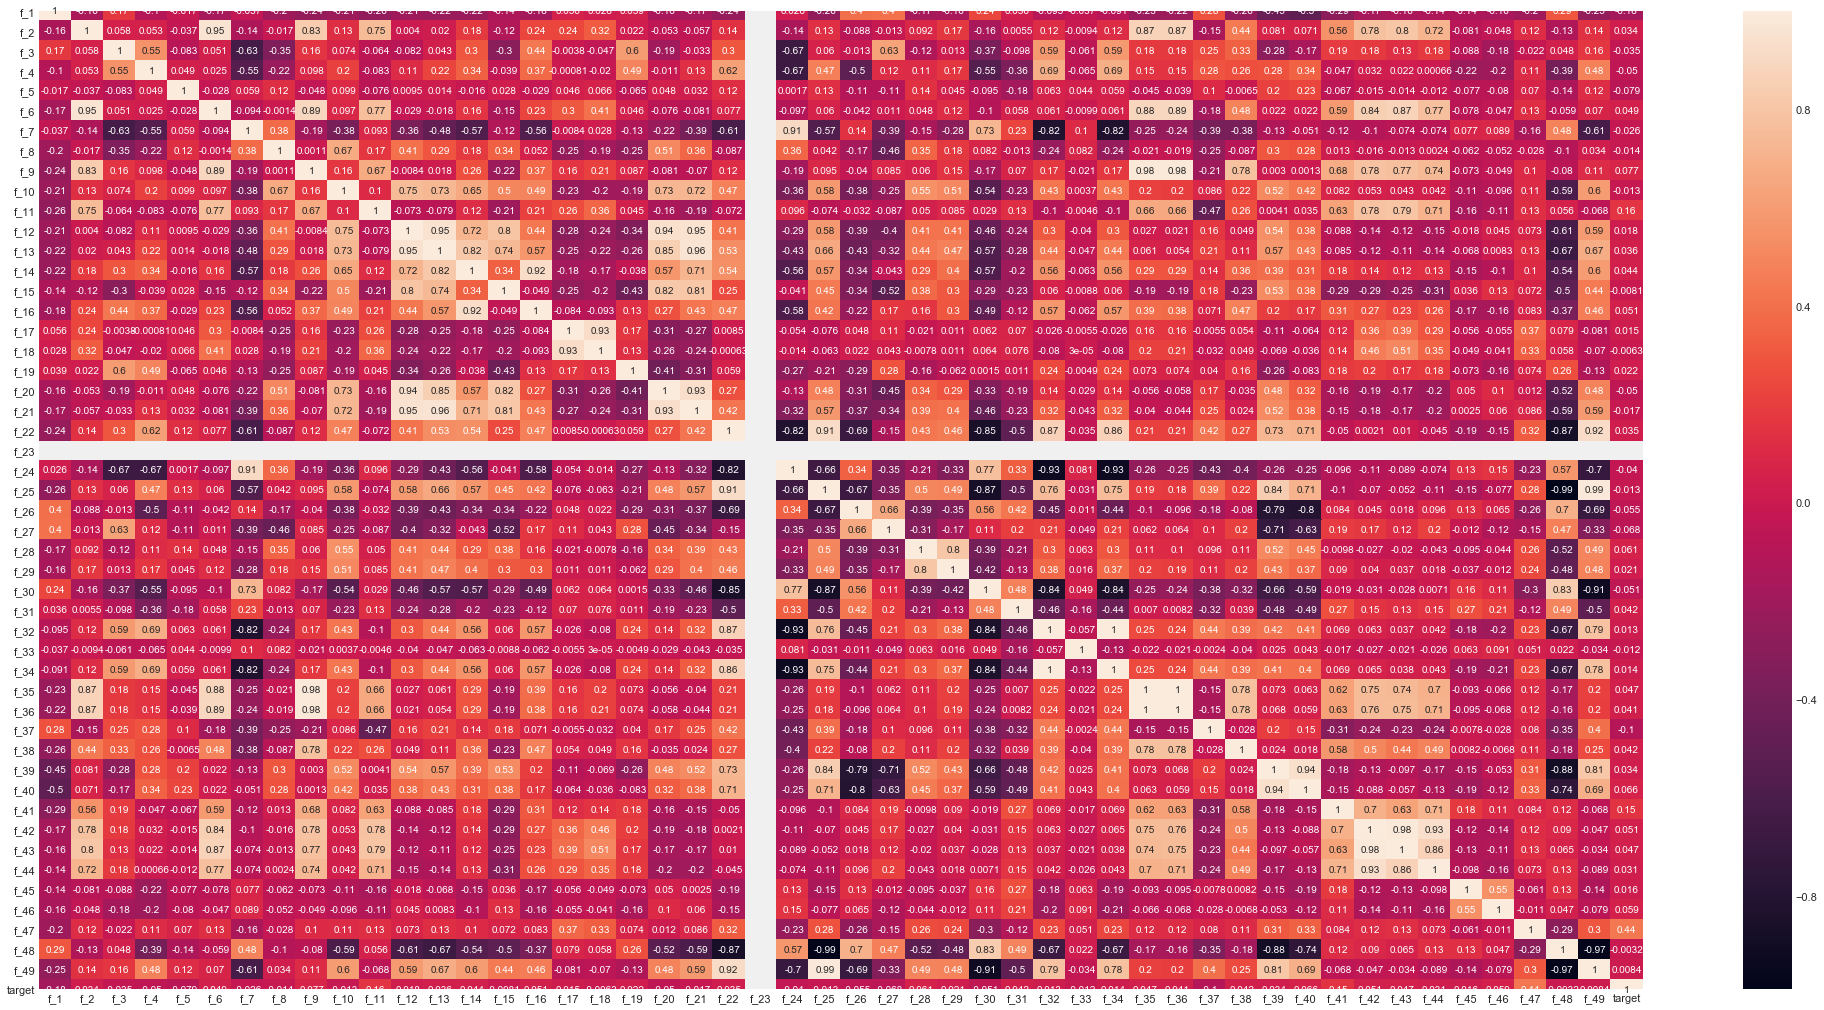

In [12]:
plt.figure(figsize = (32, 18))
sb.heatmap(df.corr(), annot = True)

### Feature Engineering 

In [34]:
x = df.drop(columns = ['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (749, 49)
x_test: (188, 49)
y_train: (749,)
y_test: (188,)


In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_train)

In [44]:
lr_pred

array([ 7.29383090e-01,  2.08143400e-01, -8.71488527e-03, -2.85361257e-02,
        2.43773901e-03,  4.87130806e-03, -3.68961258e-02,  1.04606846e-01,
       -1.28121776e-01,  1.95842581e-02, -4.99766428e-02,  4.47619216e-02,
        3.21137738e-02,  8.29751709e-02,  1.18732640e-01,  9.97627406e-01,
        1.61406541e-02,  6.34459800e-03, -6.05501579e-02,  4.71501029e-01,
        5.24167340e-02, -7.76825183e-03,  4.12191717e-01, -5.12092365e-02,
       -3.89383851e-03,  2.89455804e-02,  2.25126336e-01,  9.25757888e-02,
       -4.23318132e-02,  5.71644237e-04,  3.13074259e-01,  1.89752691e-02,
       -4.26487748e-02,  6.27405369e-03, -6.54502154e-02,  8.42507707e-02,
        8.12108446e-02,  3.04526796e-02,  5.12678183e-02,  5.99219359e-02,
        1.46637683e-01,  3.06896056e-01, -2.56334759e-02,  5.16848799e-03,
        8.85568132e-02,  1.45286142e-02, -8.32673218e-02,  5.72094437e-02,
        2.33651697e-02, -1.85581668e-02,  8.48884670e-02,  1.00870229e-01,
       -6.78216932e-02, -

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_train)

In [46]:
dtc_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,